# Lab 2: Базові алгоритми навчання без учителя та обробка текстових даних (Scikit-learn lib)
### Шевченко Юлія, ФІ-31мн

### Lab Task:

1. _**Зниження розмірності і візуалізація даних**_. Застосувати методи зниження розмірності sklearn.decomposition.PCA і sklearn.manifold.TSNE для візуалізації даних, з якими працювали в лабораторній №1 (знижуючи розмірність до двох). Візуалізувати результат.
2. _**Кластерний аналіз**_. За допомогою алгоритму k-means зробити квантування зображення (видалення візуально надлишкової інформації) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення.
3. _**Обробка та класифікація текстових даних**_. Завантажити набір текстових даних (з мітками класів). Провести передобробку даних (видалити стоп-слова, пунктуацію), за допомогою wordcloud зробити візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизувати тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Провести класифікацію текстових даних, зробити оцінку якості.

In [1]:
# All the imports for the task
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

### Dimensionality Reduction

In [2]:
# Loading dataset from csv from Lab 1
spotify_data = pd.read_csv('../Lab_1/song_data.csv')

In [3]:
# Showing the dataset
spotify_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [4]:
# Showing the dataset columns
print('The dataset contains such columns: {}'.format(spotify_data.columns))

The dataset contains such columns: Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')


In [5]:
# Considering song is popular if song_popularity value is >= 70
spotify_data['popularity'] = [1 if value >= 70 else 0 for value in spotify_data.song_popularity]

### PCA (Principal Component Analysis)

In [6]:
# Choosing numeric data
spotify_data_numeric = spotify_data.select_dtypes(include = ['float64', 'int64'])

In [7]:
# Standardize the variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(spotify_data_numeric)

In [8]:
# PCA model
PCA_model = PCA()
PCA_result = PCA_model.fit_transform(scaled_data)

In [9]:
# Calculating EVR
EVR = PCA_model.explained_variance_ratio_
evr_cumsum = np.cumsum(EVR)

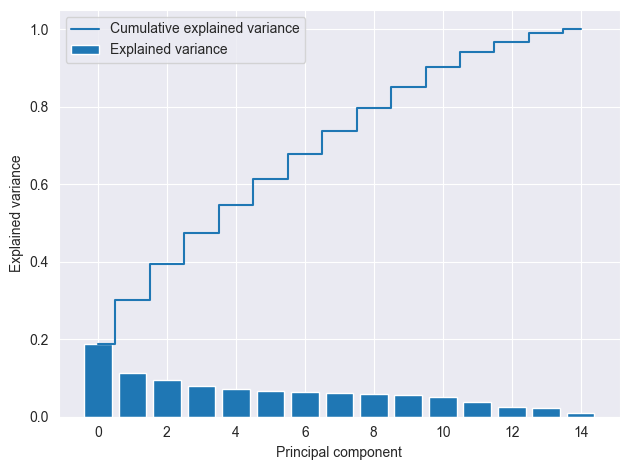

In [10]:
# Visualizing the results
plt.bar(range(0, len(EVR)), EVR, align='center', label='Explained variance')
plt.step(range(0, len(evr_cumsum)), evr_cumsum, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

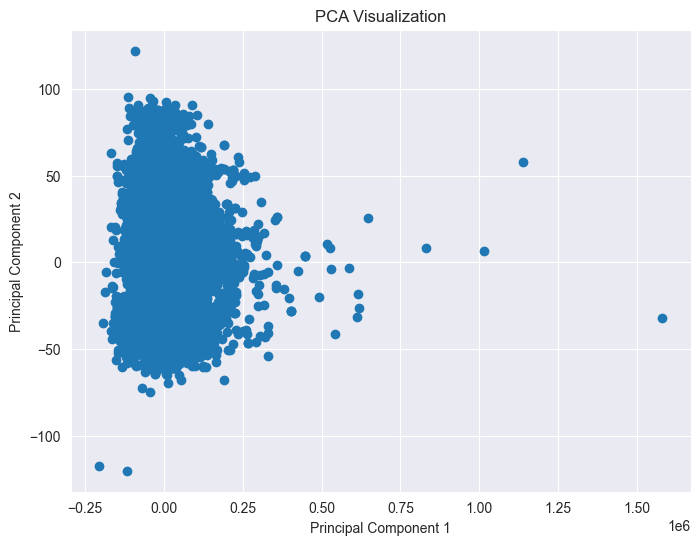

In [11]:
X = spotify_data_numeric.drop(['popularity'], axis=1)
y = spotify_data_numeric['popularity']

PCA_model = PCA(n_components=2)
PCA_result = PCA_model.fit_transform(X)

# Plot the transformed data using the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(PCA_result[:, 0], PCA_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

### tSNE

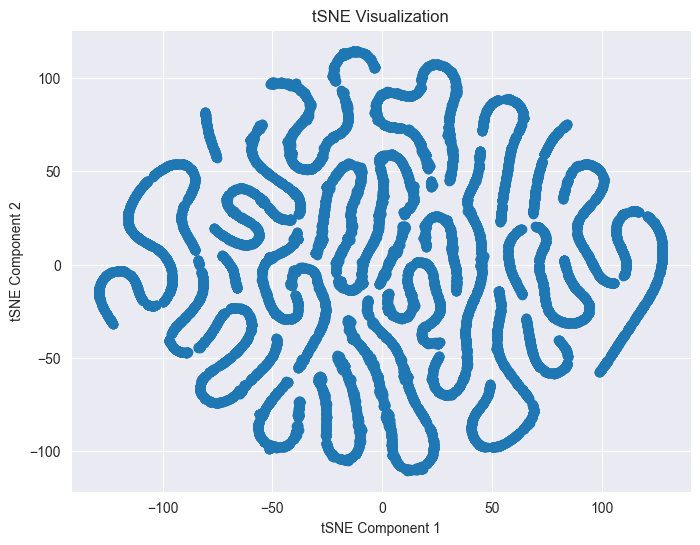

In [12]:
X = spotify_data_numeric.drop(['popularity'], axis=1)
y = spotify_data_numeric['popularity']

tSNE_model = TSNE(n_components=2)
tSNE_result = tSNE_model.fit_transform(X)

# Plot the transformed data using the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(tSNE_result[:, 0], tSNE_result[:, 1])
plt.xlabel('tSNE Component 1')
plt.ylabel('tSNE Component 2')
plt.title('tSNE Visualization')
plt.show()